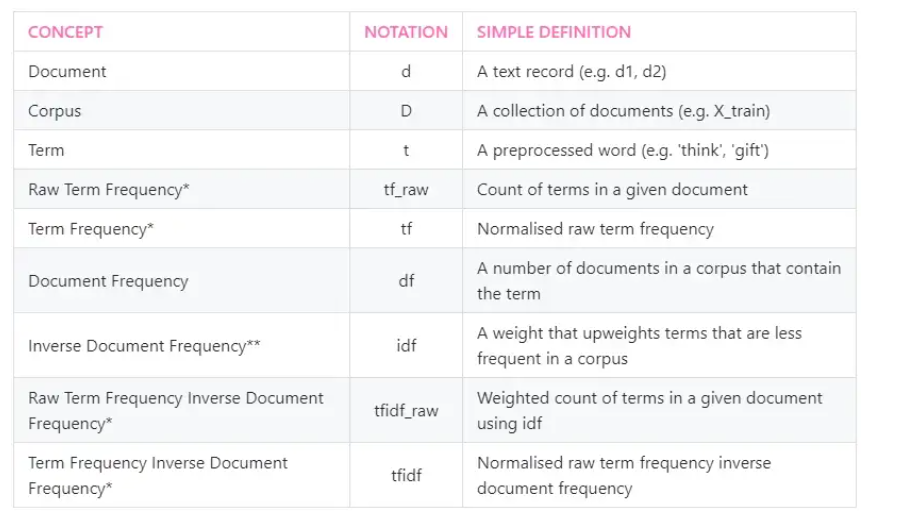

--> tf and tf-idf were broken into two variations: one based on count (_raw) and the other on percentage to make things clear.

--> A more generic definition for idf would be a weight that upweights less frequent terms and downweights more frequent terms. However, I have chosen a simple definition because the lowest weight a term can have is 1 based on the formulas being used. Either way, less frequent terms are upweighted and more frequent terms are downweighted in tf-idf compared to tf.

In [1]:
d1 = 'I thought, I thought of thinking of thanking you for the gift'
d2 = 'She was thinking of going to go and get you a GIFT!'

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 2.1. Define text processing function

In [3]:
# Import packages and modules
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a dataframe
X_train = pd.DataFrame({'text': [d1, d2]})

From now on, we will refer ‘X_train’ as our corpus (despite its size) and two sentences as documents. Second, we will need a text processing function to pass it on to TfidfVectorizer:

In [4]:
def preprocess_text(text):
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
    return keywords

This preprocessor will transform the documents to:

d1 = [‘think’, ‘think’, ‘think’, ‘thank’, ‘gift’]

d2 = [‘think’, ‘go’, ‘go’, ‘get’, ‘gift’]

# 2.2. Vectorise to tf-idf using TfidfVectorizer

In [5]:
# Create an instance of TfidfVectorizer
vectoriser = TfidfVectorizer(analyzer=preprocess_text)
# Fit to the data and transform to feature matrix
X_train = vectoriser.fit_transform(X_train['text'])
# Convert sparse matrix to dataframe
X_train = pd.DataFrame.sparse.from_spmatrix(X_train)
# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser.vocabulary_.items()}
# Rename each column using the mapping
for col in X_train.columns:
    X_train.rename(columns={col: col_map[col]}, inplace=True)
X_train

,get,gift,go,thank,think
0,0.000000,0.288972,0.000000,0.40614,0.866917
1,0.407824,0.290170,0.815648,0.00000,0.290170


In [9]:
d3 = 'He thinks he will go!'
d4 = 'They don’t know what to buy!'
# Create dataframe
X_test = pd.DataFrame({'text': [d3, d4]})
# Transform to feature matrix
X_test = vectoriser.transform(X_test['text'])
# Convert sparse matrix to dataframe
X_test = pd.DataFrame.sparse.from_spmatrix(X_test)
# Add column names to make it more readible
for col in X_test.columns:
    X_test.rename(columns={col: col_map[col]}, inplace=True)
X_test

,get,gift,go,thank,think
0,0.0,0.0,0.814802,0.0,0.579739
1,0.0,0.0,0.000000,0.0,0.000000


# 3. TF-IDF - Do it ourselves 📝

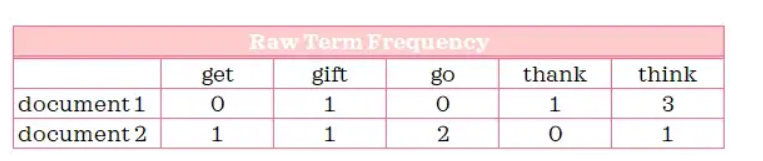

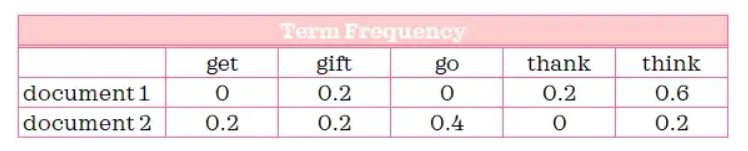

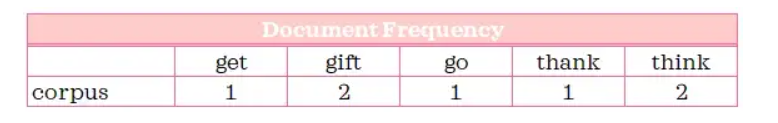

### An inverse document frequency

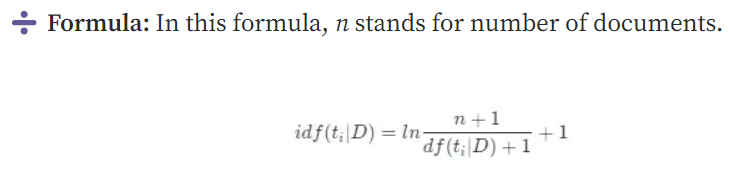

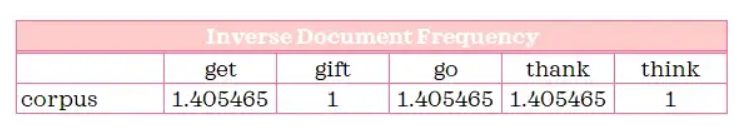

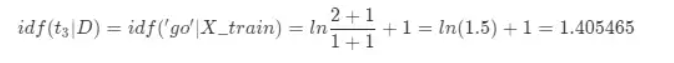

## 3.5. A raw term frequency inverse document frequency

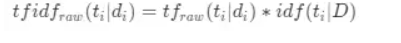

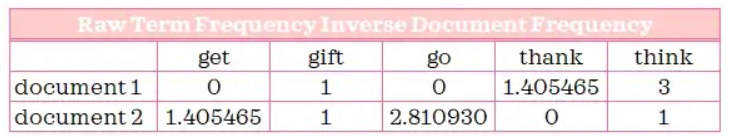

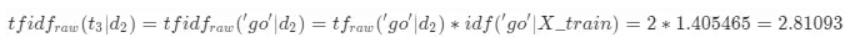

## 3.6. A term frequency inverse document frequency

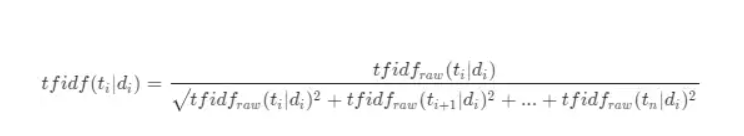

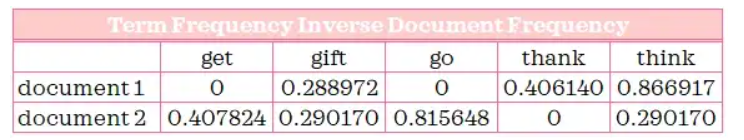

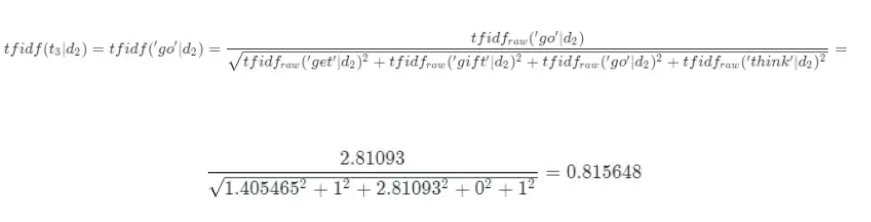

#### Before we wrap up, let’s compare tf vs tf-idf for document 1:

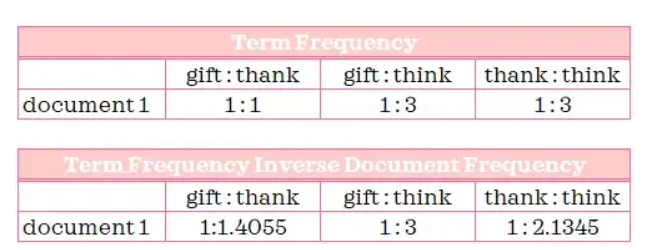